In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=8)     # fontsize of the axes title
plt.rc('axes', labelsize=8)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 8

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
data = pd.read_csv(f'{Project}/Results/Experiments/Marker-gene-Exp_adipogenesis-w-CytoD/v20240516/Marker-CytoD_result.tsv', sep='\t')#.drop(columns=['Adipoq','Cox8b'])
data['Cond'] = data['Cell']+'_'+data['Diff']+'_'+data['Treat']

data_dict = {gene : {k: list(v) for k, v in data.groupby('Cond')[gene]} for gene in ['Pparg2','Fabp4','Adipoq','Ucp1','Cox8b']}

data = data.melt(id_vars=('Cond','Cell','Diff','Treat')).rename(columns={'variable':'gene'}).dropna()
df_list = []
for key,df in data.groupby(['Cell','Diff','gene']):
    df['value'] = df['value'] / df[df['Treat']=='none']['value'].mean()
    df_list.append(df)
data = pd.concat(df_list).sort_index()

display(data, data_dict)

,Cond,Cell,Diff,Treat,gene,value
0,pre_D0_none,pre,D0,none,Pparg2,0.948767
1,pre_D0_none,pre,D0,none,Pparg2,1.109645
2,pre_D0_none,pre,D0,none,Pparg2,0.941588
3,pre_D0_CytoD,pre,D0,CytoD,Pparg2,0.709931
4,pre_D0_CytoD,pre,D0,CytoD,Pparg2,1.205982
...,...,...,...,...,...,...
115,beige_D8_none,beige,D8,none,Cox8b,0.949684
116,beige_D8_none,beige,D8,none,Cox8b,1.033905
117,beige_D8_CytoD,beige,D8,CytoD,Cox8b,1.858908
118,beige_D8_CytoD,beige,D8,CytoD,Cox8b,1.659701


{'Pparg2': {'beige_D8_CytoD': [2.007600462, 1.804346818, 1.934705672],
  'beige_D8_none': [0.999318043, 0.985950796, 1.014941544],
  'pre_D0_CytoD': [0.712001991, 1.209500096, 1.192255355],
  'pre_D0_none': [0.951534715, 1.112882536, 0.944334889],
  'white_D4_CytoD': [3.209967511, 3.587190051, 3.882700688],
  'white_D4_none': [0.854164326, 0.95953126, 1.220111281],
  'white_D8_CytoD': [2.073425111, 1.858809983, 1.903386471],
  'white_D8_none': [0.931614433, 1.025831225, 1.046376259]},
 'Fabp4': {'beige_D8_CytoD': [1.604628729, 1.522065521, 1.699341196],
  'beige_D8_none': [1.034452374, 0.972794506, 0.993729975],
  'pre_D0_CytoD': [0.960225419, 1.044174844, 1.059143319],
  'pre_D0_none': [1.097515823, 0.910815783, 1.0003654],
  'white_D4_CytoD': [2.338251078, 2.685105128, 2.499914495],
  'white_D4_none': [0.847467433, 1.007292799, 1.171443247],
  'white_D8_CytoD': [1.450176497, 1.41007483, 1.614145318],
  'white_D8_none': [0.947964729, 1.044306457, 1.010136021]},
 'Adipoq': {'beige_D8_C

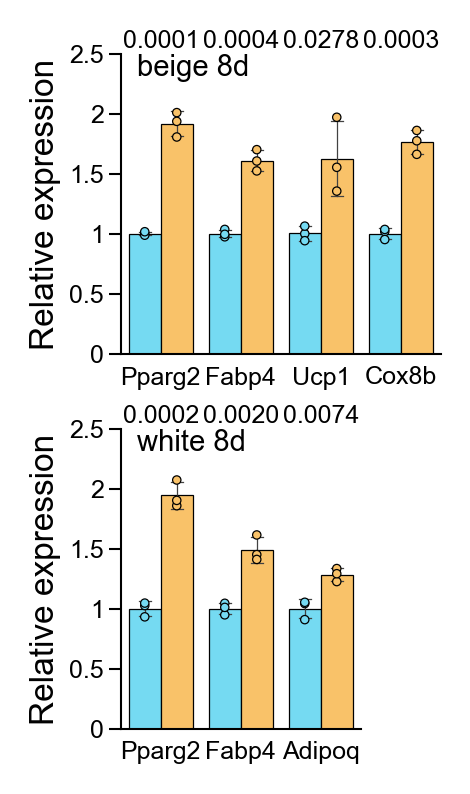

<Figure size 640x480 with 0 Axes>

In [3]:
sF = 1 # Size factor
wgap = 0
hgap = 0.25
nrow, ncol = 2, 5

width_ratios = [0.8/3]*5
height_ratios = [1]*2

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
for CT, day, genes in zip(['beige','white'],['D8','D8'],[['Pparg2','Fabp4','Ucp1','Cox8b'],['Pparg2','Fabp4','Adipoq']]):
    ax = fig.add_subplot(grid[row,0:len(genes)])

    using_data = data[(data['Cell']==CT) & (data['Diff']==day)]
    using_data = pd.merge(pd.DataFrame({'gene':genes}), using_data, on='gene')
    sns.barplot(data=using_data, x="gene", y='value',
                hue='Treat',
                palette=['#75DAF2','#F9C269'], saturation=1,
                width=0.8,
                errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
                ax=ax, linewidth = 0.3, edgecolor='k',
                legend=False)

    sns.stripplot(data=using_data, x="gene", y='value',
                  hue='Treat', dodge=True,
                palette=['#75DAF2','#F9C269'],
                size=2, linewidth=0.3, edgecolor='k',
                jitter=False,
                legend=False)
    ax.text(-0.3, 2.5, f'{CT} {day[1]}d', ha='left', va='top', fontsize=7)

    # ax.set_xlim(-0.6, 2.6)
    ax.set_ylim(0, 2.5)
    ax.set_yticks([0, 0.5, 1, 1.5, 2, 2.5])
    ax.set_yticklabels([0, 0.5, 1, 1.5, 2, 2.5])
    ax.tick_params(width=0.5, length=3, pad=1)
    ax.tick_params(axis='x', length=0, pad=3)
    # if row==0: ax.set_xticks([])

    ax.set_xlabel('')
    ax.set_ylabel('Relative expression', labelpad=2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    # paired T-test
    from scipy import stats
    for i, gene in enumerate(genes):
      stat, pv = stats.ttest_ind(data_dict[gene][f'{CT}_{day}_none'], data_dict[gene][f'{CT}_{day}_CytoD'])
      ax.text(i, 2.7,f'{pv:.4f}', horizontalalignment='center', verticalalignment='top', fontsize=6, color='k', rotation=0)


    row += 1

## Show and save the plot
plt.savefig('Marker-CytoD_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()